## Titatnic classification

classification using tiatnic dataset https://www.kaggle.com/c/titanic

In [199]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

### Importing the data

Here we import training data and data we are predicting and also a bit of information about data.

In [265]:
data = pd.read_csv("../datasets/titanic/train.csv", index_col="PassengerId")
predict_data = pd.read_csv("../datasets/titanic/test.csv", index_col="PassengerId")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Basic data analysis

### Display information about data

Here we display a few basic information about data

- fist few rows
- data description

In [266]:
display(data.head())
display(data.describe())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Displaying histogram of data and correlations for numerical values

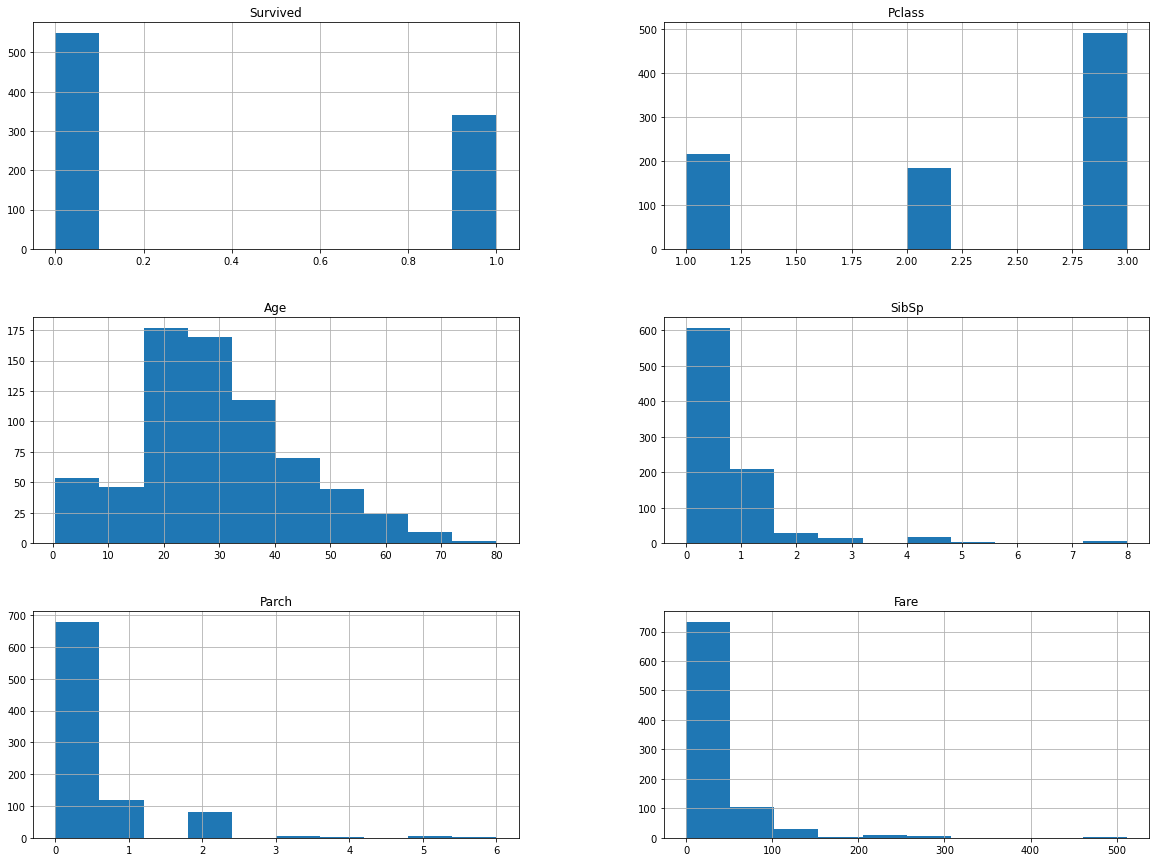

In [274]:
data.hist(figsize=(20,15))
plt.show()

We can deduce several things from this:
- We can see there are more people that died, compared to survivors. We should use statified sampling when doing test/train split, so we keep the same distribution in test and train sets.
- We can see more people from 3rd class, compared to 1st and 2nd class combined.
- A lot of people traveling with 0 or 1 sibling similar results for parents/children relationship.

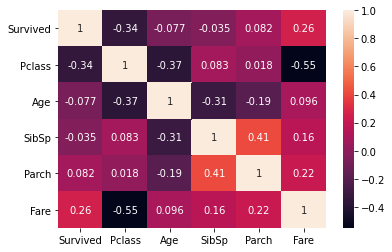

In [325]:
sns.heatmap(data.corr(), annot=True)
plt.show()

**Conclusion:** Only fare has significant correlation with survivability.

## Exploratory data analysis

### **Pclass:** Comparing ticket class with suvivability

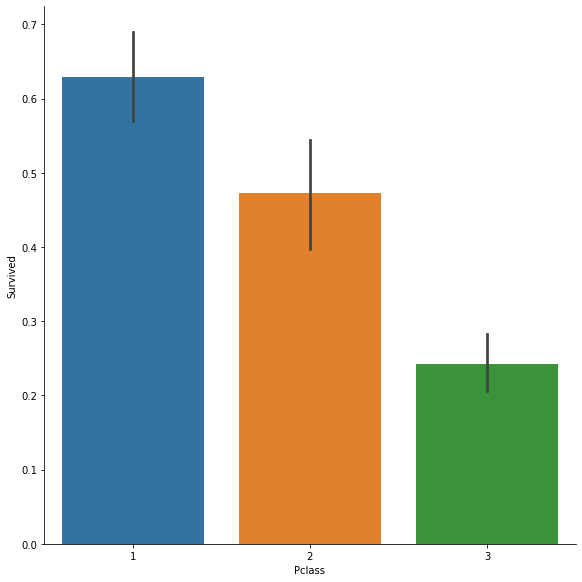

In [292]:
sns.catplot(x = "Pclass", y = "Survived", data = data, kind="bar", height = 8)

**Conclusion:** We can see that first and second classes have significant more survivability, compared to 3rd class.

### Sex: comparing sex vs survivability

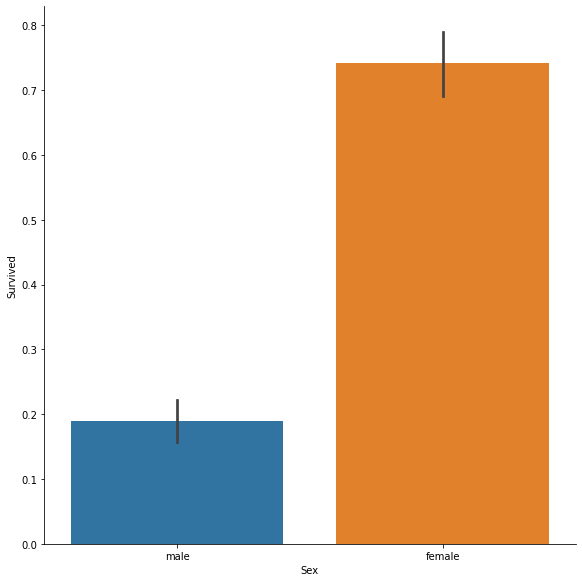

In [293]:
sns.catplot(x = "Sex", y = "Survived", data = data, kind="bar", height = 8)

**Conclusion:** Around 4 times more woman survived, compared to men.

### Sex and pclass: comparing sex and passanger class with survivability

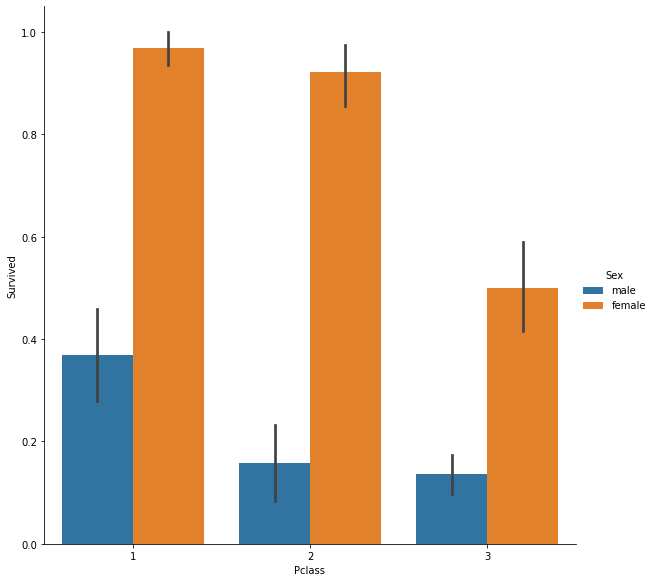

In [298]:
sns.catplot(x = "Pclass", y = "Survived", hue='Sex', data = data, kind="bar", height = 8)

**Conclusion**

- In each class women have much greater chance of survival than men.
- In first class men have greater change of survival, compared to other classes.

### Age: comparing age vs survivability

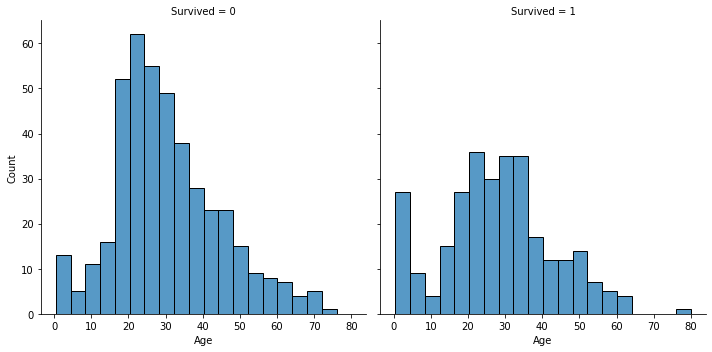

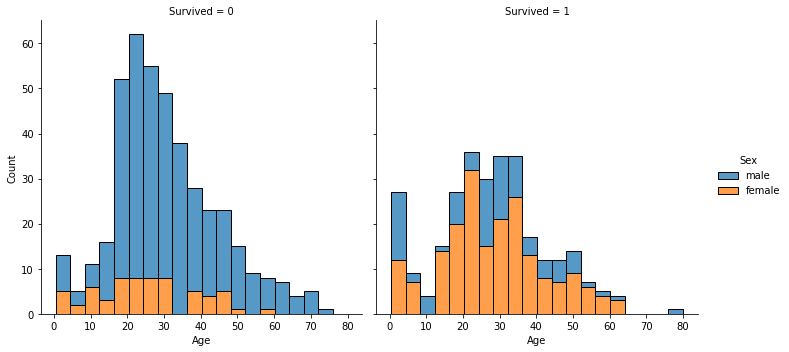

In [290]:
sns.displot(data=data, x="Age", col="Survived")
sns.displot(data=data, x="Age", col="Survived", hue='Sex', multiple='stack')

**Conclusions:**

- Survivability is quite large for babies, probably because they are not heavy and are children of course.
- Survivability is also quite high for people up to around 35 and women had priority.

### SibSp: comparing number of siblings/spouses and survivability

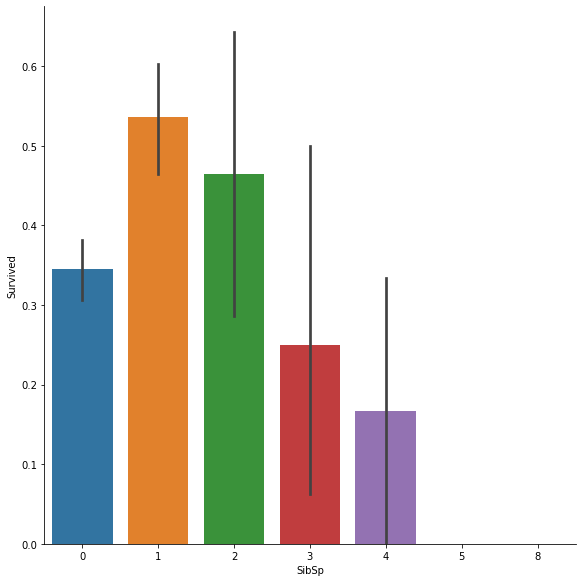

In [295]:
sns.catplot(x = "SibSp", y = "Survived", data = data, kind="bar", height = 8)

**Conclusion**

- People with 1 or 2 siblings have most chance of survival
- More siblings you have, less change of survival

### Parch: comparing number of parents/children and survivability

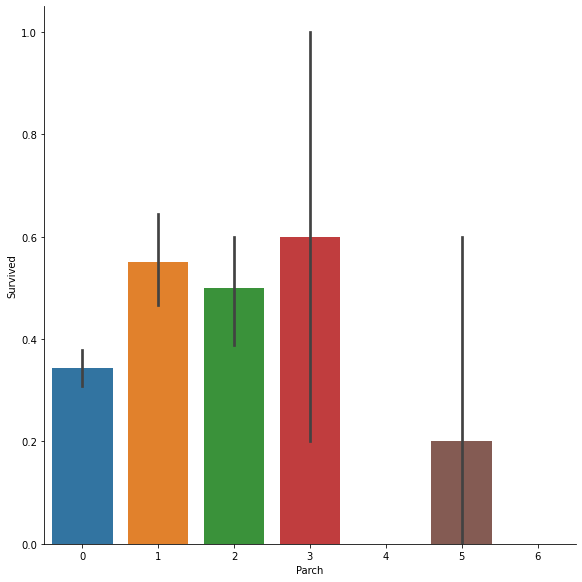

In [296]:
sns.catplot(x = "Parch", y = "Survived", data = data, kind="bar", height = 8)

## Preparing the data

### Splitting into train and test set

In [299]:
from sklearn.model_selection import train_test_split

train_cols = ["Pclass", "Sex", "SibSp", "Parch", 'Fare', 'Embarked']

X = data[train_cols]
Y = data["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.1, stratify=Y)

### Creating preprocessing pipeline

- Numerical values: Sets empty values to median and normalizes values
- Categorical values: Fills in missing values, uses one hot encoder to encode values

In [311]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_columns = list(X_train.select_dtypes(include=numerics))
cat_columns = list(X_train.select_dtypes(exclude=numerics))

pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns),
])

pipeline.fit(X_train)

cat_features = list(pipeline.named_transformers_["cat"]["encoder"].get_feature_names(cat_columns))

### Construct back the data

In [338]:
X_train_prepared = pd.DataFrame(data=pipeline.transform(X_train), columns=num_columns+cat_features)
X_test_prepared = pd.DataFrame(data=pipeline.transform(X_test), columns=num_columns+cat_features)
X_predict_prepared = pd.DataFrame(data=pipeline.transform(predict_data[train_cols]), columns=num_columns+cat_features)
X_prepared = pd.DataFrame(data=pipeline.transform(X), columns=num_columns+cat_features)

X_train_prepared

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,0.823898,0.437238,3.151950,0.051433,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.575892,-0.472444,0.732485,0.546842,1.0,0.0,1.0,0.0,0.0,0.0
2,0.823898,-0.472444,-0.477248,-0.163171,0.0,1.0,0.0,1.0,0.0,0.0
3,0.823898,-0.472444,-0.477248,-0.488225,0.0,1.0,0.0,0.0,1.0,0.0
4,0.823898,-0.472444,-0.477248,-0.506852,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
796,0.823898,-0.472444,-0.477248,-0.507377,1.0,0.0,0.0,0.0,1.0,0.0
797,0.823898,0.437238,3.151950,0.051433,1.0,0.0,0.0,0.0,1.0,0.0
798,-1.575892,-0.472444,-0.477248,0.138009,0.0,1.0,0.0,0.0,1.0,0.0
799,-0.375997,-0.472444,-0.477248,-0.449659,1.0,0.0,0.0,0.0,1.0,0.0


## Learning a model

Tries different classifiers with different input parameters and selects one with best score

In [316]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import cross_val_predict, GridSearchCV, RandomizedSearchCV


classification_pipeline = Pipeline([
    ('clf', KNeighborsClassifier())
])

parameters = [
    {
        'clf': (KNeighborsClassifier(),),
        'clf__n_neighbors': (2, 3, 5),
    },
    {
        'clf': (GaussianNB(),)
    },
    {
        'clf': (DecisionTreeClassifier(random_state=42),)
    },
    {
        'clf': (SVC(random_state=42, gamma='auto'),)
    },
    {
        'clf': (RandomForestClassifier(random_state=42, n_estimators=100, max_depth=3),),
        "clf__n_estimators": [10, 100, 1000]
    },
    {
        'clf': (AdaBoostClassifier(),)
    },
    {
        'clf': (MLPClassifier(max_iter=10000, hidden_layer_sizes=(100, 200, 200, 100), early_stopping=True),)
    },
    {
        'clf': (GaussianProcessClassifier(),)
    }
]

grid_search = GridSearchCV(classification_pipeline, parameters, cv=3, n_jobs=-1)
grid_search.fit(X_train_prepared, Y_train)

display(grid_search.best_score_)
display(grid_search.best_params_)

best_model = grid_search.best_estimator_

0.8064918851435706

{'clf': SVC(gamma='auto', random_state=42)}

### Evaluates classifier using test data

In [330]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_test_pred = best_model.predict(X_test_prepared)

result1 = classification_report(Y_test, Y_test_pred)
print(result1)

accuracy = accuracy_score(Y_test, Y_test_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        55
           1       0.75      0.69      0.72        35

    accuracy                           0.79        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.79      0.79      0.79        90

0.7888888888888889


### Write predictions

In [342]:
Y_predict_pred = best_model.predict(X_predict_prepared)

submission = pd.read_csv('../datasets/titanic/gender_submission.csv')
submission['Survived'] = Y_predict_pred
submission.to_csv('submission.csv', index=False)